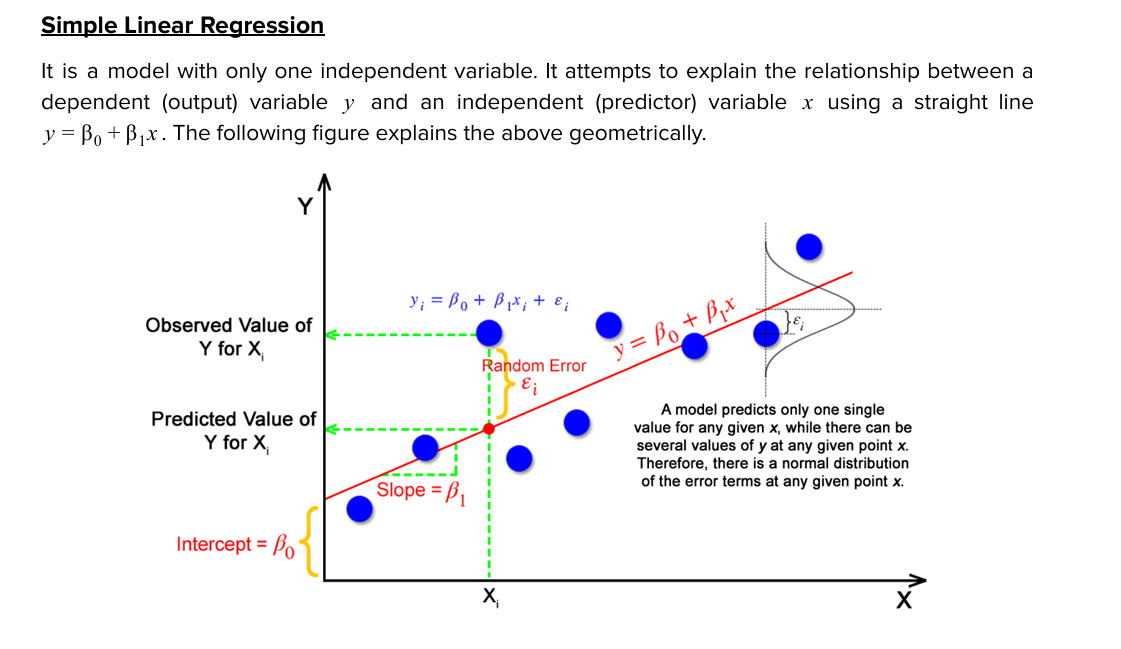

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')


## Loading dataset : Company_Profit

In [2]:
df = pd.read_csv('Company_Profit_lyst1729240579399.csv')
df

,Startup_Yrs_Operation,Profit
0,0.9,38143
1,1.2,45452
2,1.6,32220
3,2.1,43525
4,2.3,39891
5,2.6,57642
6,3.1,60150
7,3.8,63418
8,3.8,64445
9,3.6,64445


## Check relationship of any independent variable with target variable 

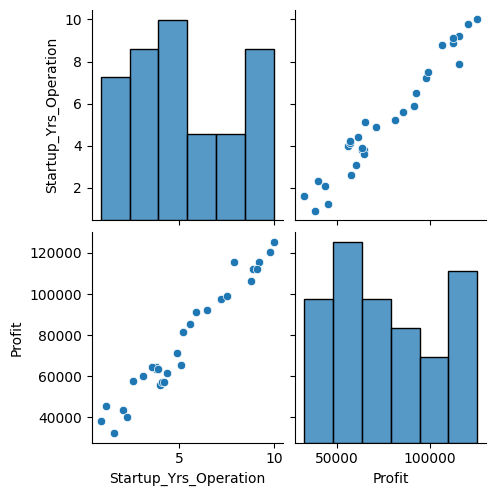

In [3]:
sns.pairplot(df)

## Separate input and target

In [4]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1:].values

In [5]:
X

array([[ 0.9],
       [ 1.2],
       [ 1.6],
       [ 2.1],
       [ 2.3],
       [ 2.6],
       [ 3.1],
       [ 3.8],
       [ 3.8],
       [ 3.6],
       [ 3.9],
       [ 4. ],
       [ 4.1],
       [ 4.2],
       [ 4.4],
       [ 4.9],
       [ 5.1],
       [ 5.2],
       [ 5.6],
       [ 5.9],
       [ 6.5],
       [ 7.2],
       [ 7.5],
       [ 7.9],
       [ 8.8],
       [ 8.9],
       [ 9.2],
       [ 9.1],
       [ 9.8],
       [10. ]])

In [6]:
y

array([[ 38143],
       [ 45452],
       [ 32220],
       [ 43525],
       [ 39891],
       [ 57642],
       [ 60150],
       [ 63418],
       [ 64445],
       [ 64445],
       [ 63218],
       [ 55794],
       [ 56957],
       [ 57081],
       [ 61243],
       [ 71243],
       [ 65123],
       [ 81234],
       [ 85423],
       [ 91245],
       [ 92354],
       [ 97652],
       [ 99000],
       [115432],
       [106524],
       [112098],
       [115432],
       [112342],
       [120543],
       [125432]])

## Create Train & Test data

In [7]:
# split the data set into train test part
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=7)

In [8]:
X_train

array([[10. ],
       [ 4.1],
       [ 4.2],
       [ 5.1],
       [ 0.9],
       [ 9.8],
       [ 3.1],
       [ 9.2],
       [ 6.5],
       [ 3.9],
       [ 7.2],
       [ 3.8],
       [ 4.4],
       [ 3.8],
       [ 7.9],
       [ 5.9],
       [ 2.1],
       [ 7.5],
       [ 8.9],
       [ 2.3],
       [ 4.9]])

In [9]:
X_test

array([[1.6],
       [5.2],
       [1.2],
       [3.6],
       [4. ],
       [2.6],
       [5.6],
       [8.8],
       [9.1]])

## Train Model

In [10]:
# application of model:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

## Analyze Model

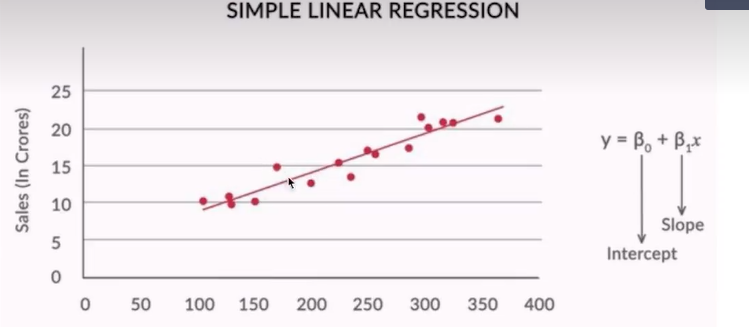
#### y=mx+c  ::  y = B0+B1*x  where x = Startup_Yrs_Operation


Intercept(c) : [21609.36992367]
Coeff(B1) : [10388.12321734]

Linear Regression:y = mx+c
y = [10388.12321734]*Startup_Yrs_Operation + [21609.36992367]


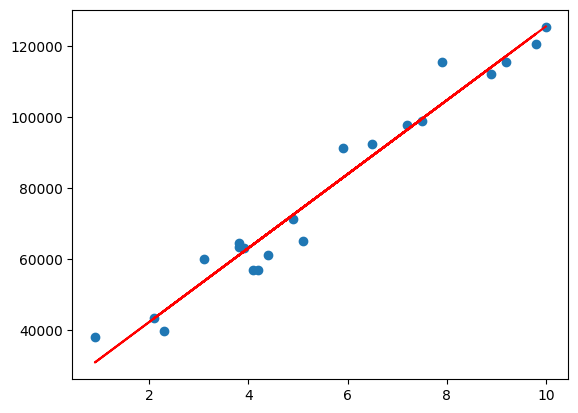

In [11]:
print(f"Intercept(c) : {lr.intercept_}")
print(f"Coeff(B1) : {lr.coef_[0]}")
print(f"\nLinear Regression:y = mx+c\ny = {lr.coef_[0]}*Startup_Yrs_Operation + {lr.intercept_}")
plt.scatter(X_train,y_train)
plt.plot(X_train,lr.intercept_+lr.coef_*X_train,'red')

## Analyse Residual :

Text(0.5, 1.0, 'Redisual or Error Distribution')

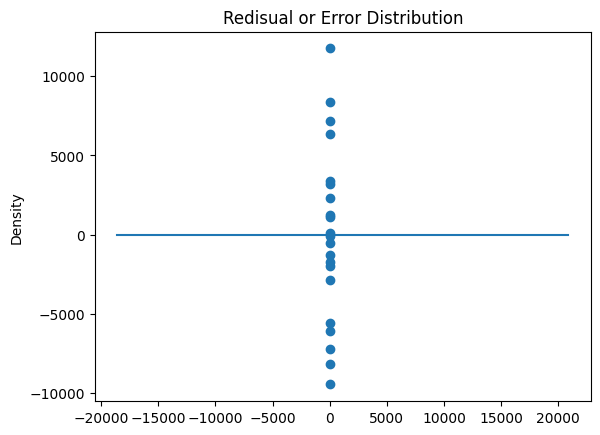

In [12]:
# y_train and y_train_predict
y_train_predict =lr.predict(X_train)
Residual = y_train - y_train_predict
sns.distplot(Residual,bins =15) # checking if residuals are normally distributed
plt.scatter(X_train,Residual)# Checking for independence of residuals
plt.title('Redisual or Error Distribution')

## Predict

In [13]:
y_pred = lr.predict(X_test)


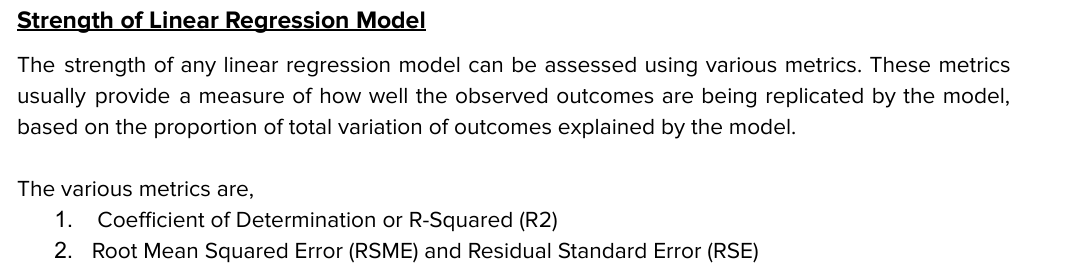

## Model Evaluation
- r2_score
-  mean_absolute_error
-  mean_squared_error

In [14]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
print("rsme is irralevent and mean_absolute_error be calculated")
print('Absolute error find the absolute value of -ve or +ve error in the dataset')

rsme is irralevent and mean_absolute_error be calculated
Absolute error find the absolute value of -ve or +ve error in the dataset


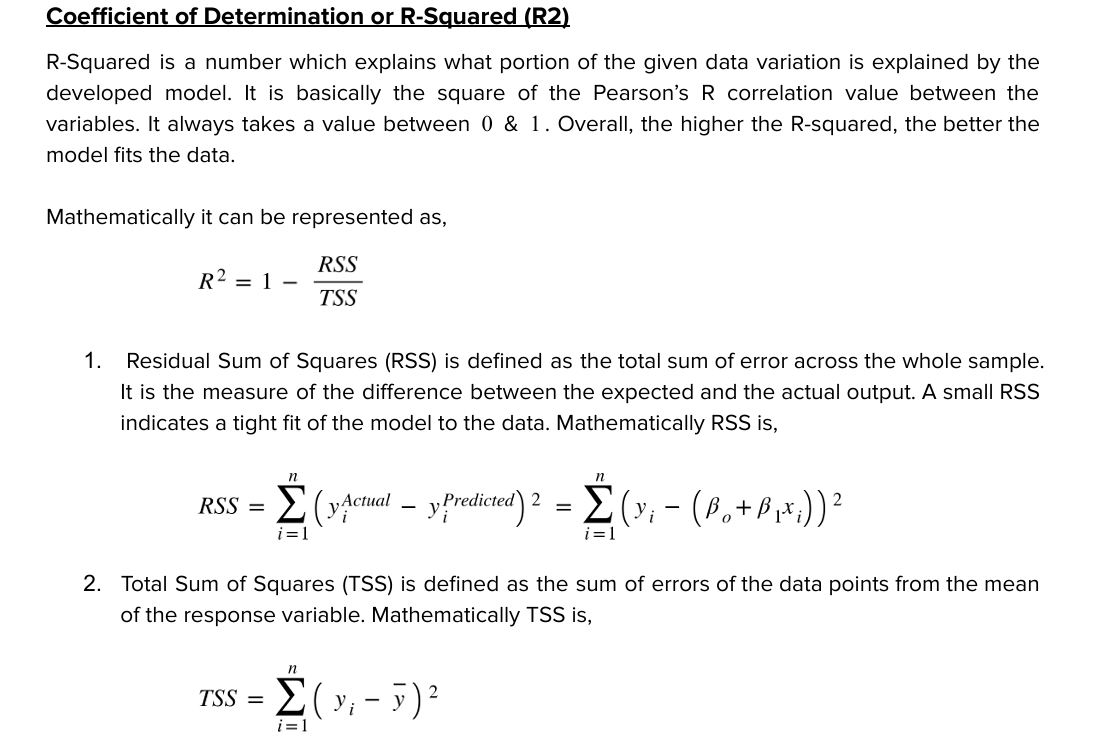

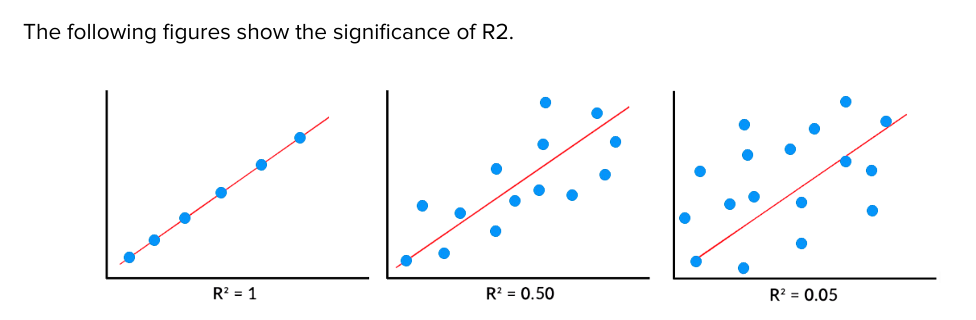

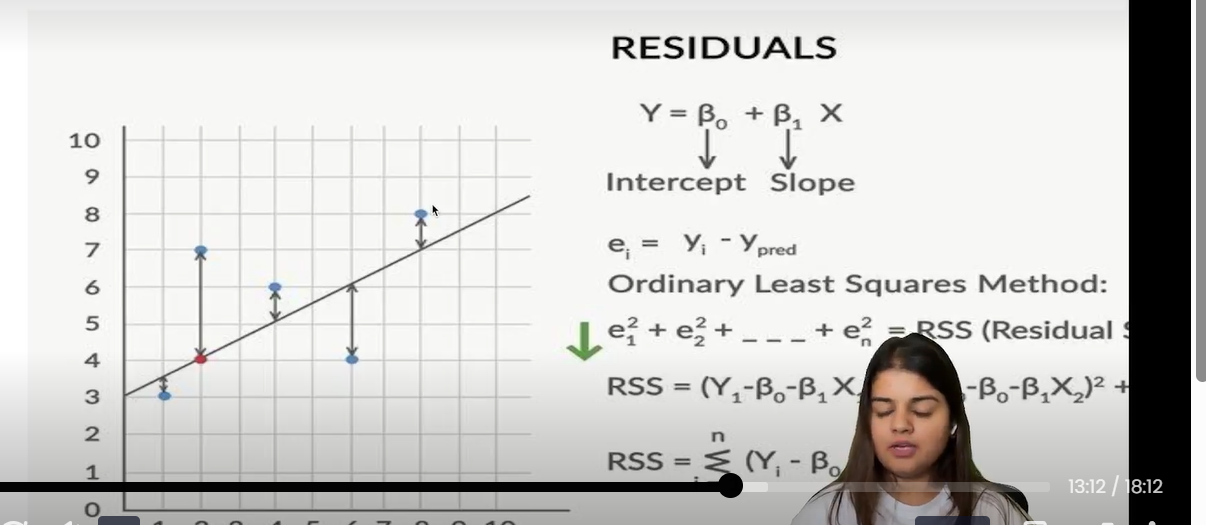

In [15]:
# Accuracy score : y_predict and y_test
# r2_score or score of model : X_train and y_train
print(f"r2_score :{lr.score(y_test,y_pred)}")
print(f"mean_absolute_error :{mean_absolute_error(y_test,y_pred)}")


r2_score :-791125497.9436772
mean_absolute_error :6751.520347582522


## Visualize Model

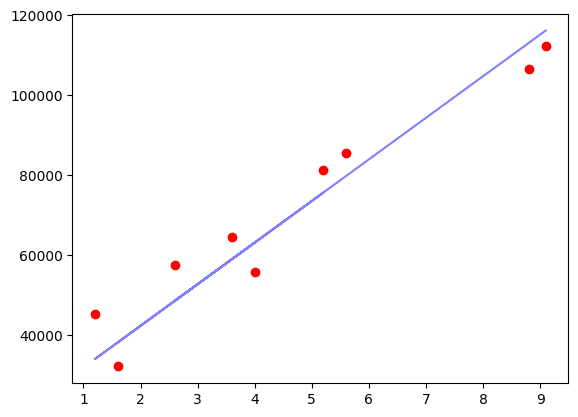

In [16]:
import matplotlib.pyplot as plt
plt.scatter(X_test,y_test,color= 'red')
plt.plot(X_test,lr.intercept_+lr.coef_*X_test,color = 'blue',alpha =0.5) # alpha - color contast